Population in the beginning: 450
Generation: 1	Fitness: 1455004.1481339887	Population: 243
Generation: 2	Fitness: 1436450.5295023683	Population: 282
Generation: 3	Fitness: 1416662.7195194273	Population: 360
Generation: 4	Fitness: 1389108.731969546	Population: 411
Generation: 5	Fitness: 906084.2134613657	Population: 428
Generation: 6	Fitness: 847326.88086367	Population: 433
Generation: 7	Fitness: 570891.7106206549	Population: 431
Generation: 8	Fitness: 491577.8050217156	Population: 421
Generation: 9	Fitness: 491577.8050217156	Population: 417
Generation: 10	Fitness: 456083.00667710963	Population: 423
Generation: 11	Fitness: 456083.00667710963	Population: 415
Generation: 12	Fitness: 456083.00667710963	Population: 419
Generation: 13	Fitness: 456083.00667710963	Population: 409
Generation: 14	Fitness: 456083.00667710963	Population: 410


['I_love_tigersugar', 89816.10909, 104953.6857, 12950.16667, 19596.60909, 40048.05433, 38079.10433, 102108.8758, 77778.36147, 858.6666667, 835.0, 33023.3428

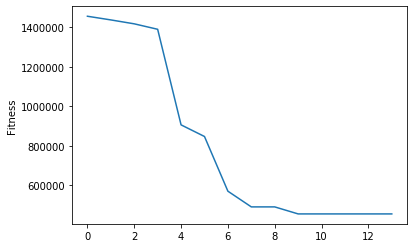

In [40]:
import numpy as np
import csv
import heapq
import random
import math
import matplotlib.pyplot as plt
import atexit
from time import time, strftime, localtime
from datetime import timedelta

def secondsToStr(elapsed=None):
    if elapsed is None:
        return strftime("%S", localtime())
    else:
        return str(timedelta(seconds=elapsed))

def log(s, elapsed=None):
    line = "="*40
    if elapsed:
        print(elapsed)

def endlog():
    end = time()
    elapsed = end-start
    return secondsToStr(elapsed)

start = time()
atexit.register(endlog)
log("")

h_member = 3
generation_size = 5
list_fitness =[]
population_temp = []

with open(r"C:\Users\DUONG\Desktop\data-selection\data.norm2.csv", "rt",encoding = 'unicode_escape') as f:
    reader = csv.reader((line.replace('\0','') for line in f))
    countt = 0
    for line in enumerate(reader):
        count=0
        candi = []
        for row in line[1]:
            if(countt == 0):
                candi.append(row)
                count = count + 1
            else:
                if(count < 3):
                    candi.append(row)
                else:
                    candi.append(float(row))
                count = count + 1
        countt += 1
        population_temp.append(candi)
    population_size = round((len(population_temp)-1)*0.9)
    m = count - 4

del population_temp[0]
for i in range(0,len(population_temp)):
    del population_temp[i][0]
    del population_temp[i][1]
    
list_score = []
score = []
for j in range(1,m+1):
    for i in range(0,len(population_temp)-1):
        score.append(population_temp[i][j])
    top3 = sorted(zip(score), reverse=True)[:h_member]
    summ = 0
    for i in top3:
        summ = summ + i[0]
    list_score.append(summ)
    score = []

class Individual(object):
    def __init__(self, candi): 
        self.candi = candi  
        self.fitness = self.cal_fitness() 

    def cal_fitness(self):
        fitness = 0
        for j in range(1,m+1):
            team_score = 0
            for k in range(h_member):
                team_score = team_score + self.candi[k][j]
            fitness = fitness + (list_score[j-1]-team_score)**2
        fitness = math.sqrt(fitness)
        return fitness
    
    def mate(self,partner):
        child = []
        for gp1, gp2 in zip(self.candi,partner.candi):
            sum_gp1 = sum(gp1[1::])
            sum_gp2 = sum(gp2[1::])
            bett = gp1 if sum_gp1 > sum_gp2 else gp2
            wors = gp2 if sum_gp1 > sum_gp2 else gp1
            prob = random.random()
            if prob < 0.60:
                if bett in child:
                    pass
                else:
                    child.append(bett)
            elif prob < 0.90:
                if wors in child:
                    pass
                else:
                    child.append(wors)
            else:
                tem = random.choice(population_temp[::])
                if tem in child:
                    pass
                else:
                    child.append(tem)
        while len(child) < 3:
            j = random.choice(population_temp[::])
            if j in child:
                pass
            else:
                child.append(j)
        return Individual(child)
    
    def check_minimumscore(self):
        for j in range(1,m+1):
            team_score = 0
            for k in range(h_member):
                team_score = team_score + self.candi[k][j]
            if 0.3*list_score[j-1] > team_score:
                return 0
            else:
                return 1
    def check_cost(self):
        for j in range(1,m):
            team_score = 0
            for k in range(h_member):
                team_score = team_score + self.candi[k][j]
            if 0.3*list_score[j-1] > team_score:
                return 0
            else:
                return 1
    
def main():
    global population_size
    global generation_size
    global list_fitness
    #global list_score
    population = []
    candi = []
    limit = 0
    
    candi.append(population_temp[0])
    candi.append(population_temp[5])
    candi.append(population_temp[6])
    copy = candi.copy()
    population.append(Individual(copy))
    del candi[::]

    for _ in range(0,population_size-1):
        for _ in range(h_member):
            while len(candi) < 3:
                j = random.choice(population_temp[::])
                if j in candi:
                    pass
                else:
                    candi.append(j)
        copy = candi.copy()
        population.append(Individual(copy))
        del candi[::]

    loop_check = False
    generation = 1
#     for i in range(0,len(list_score)):
#         print(list_score[i])
    print("Population in the beginning: {0}".format(len(population)))
    while True:
        population = sorted(population, key = lambda x:x.fitness,reverse=False)
        
        new_generation = []
        s = int((10*population_size)/100)
        new_generation.extend(population[:s])
        
        s = int((90*population_size)/100)
        for _ in range(s):
            #parent1 = random.choice(population[::])
            #parent2 = random.choice(population[::])
            parent1 = random.choice(population[:round(population_size*0.5)])
            parent2 = random.choice(population[:round(population_size*0.5)])
            child = parent1.mate(parent2)
            new_generation.append(child) 
  
        population = new_generation
        #print(len(population))
        for p in population:
            if (p.check_minimumscore() !=1):
                population.remove(p)
        #print(len(population))
        print("Generation: {0}\tFitness: {1}\tPopulation: {2}".
        format(generation,
        population[0].fitness,len(population)))
        list_fitness.append(round(population[0].fitness))
        #print(list_score[generation])
        #list_score[generation-1] = 0
        if generation_size - generation < 0:
            fit_check = list_fitness[generation-1]
            j = 1
            for i in range(1,generation_size+1):
                if list_fitness[generation-i-1] == fit_check:
                    j = j + 1
            if j == 5:
                loop_check = True
        if loop_check == True:
            break
        generation += 1

    print("\n")
    for i in range(3):
        print(population[0].candi[i],"\n")
if __name__ == '__main__':
    main()

plt.plot(list_fitness)
plt.ylabel('Fitness')
print("\n\nExcution time: {0}s".format(endlog()))

In [48]:
# population = []
# candi = []
# limit = 0
# for _ in range(0,population_size):
#     for _ in range(h_member):
#         while len(candi) < 3:
#             j = random.choice(population_temp[::])
#             if j in candi:
#                 pass
#             else:
#                 candi.append(j)
#     copy = candi.copy()
#     population.append(Individual(copy))
#     del candi[::]

In [ ]:
#     for _ in range(0,population_size-1):
#         if(limit <= len(population_temp)-3):
#             candi.append(population_temp[limit])
#             candi.append(population_temp[limit+1])
#             candi.append(population_temp[limit+2])
#             limit += 3
#         else:
#             while len(candi) < 3:
#                 j = random.choice(population_temp[::])
#                 if j in candi:
#                     pass
#                 else:
#                     candi.append(j)
#         copy = candi.copy()
#         population.append(Individual(copy))
#         del candi[::]